In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import shap

In [2]:
# Load the dataset for behavioral difficulty analysis
behavioral_data = pd.read_csv('behavioral_difficulty.csv')

In [3]:
# Check for missing values in the dataset
missing_values_behavioral = behavioral_data.isnull().sum()

In [4]:
missing_values_behavioral

Are you still going to school?                                                                                                                                                                                                                                0
Do you have any other children living in your house with you?                                                                                                                                                                                                 0
How many people live in your home with you (including adults)?                                                                                                                                                                                                0
What year are you in now?                                                                                                                                                                                                               

In [5]:
# Define the target column for multiclass logistic regression
target_column_behavioral = 'behavioral difficulty category'  # Assuming this is the target column

In [6]:
# Separate features (X) and target (y)
X_behavioral = behavioral_data.drop(columns=[target_column_behavioral], errors='ignore')
y_behavioral = behavioral_data[target_column_behavioral]

In [7]:
# Split the data into training and testing sets
X_train_behavioral, X_test_behavioral, y_train_behavioral, y_test_behavioral = train_test_split(
    X_behavioral, y_behavioral, test_size=0.3, random_state=42, stratify=y_behavioral)

### 1. LogisticRegression

In [8]:
# Build the multiclass logistic regression model
behavioral_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=500)
behavioral_model.fit(X_train_behavioral, y_train_behavioral)

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LogisticRegression(max_iter=500, multi_class='multinomial')

In [9]:
# Predict on the test set
y_pred_behavioral = behavioral_model.predict(X_test_behavioral)

In [25]:
# Calculate train and test accuracies
train_accuracy = behavioral_model.score(X_train_behavioral, y_train_behavioral)
test_accuracy = behavioral_model.score(X_test_behavioral, y_test_behavioral)

# Display the accuracies
print(f"Train Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")


Train Accuracy: 1.00
Test Accuracy: 0.94


In [10]:
# Evaluate the model
behavioral_accuracy = accuracy_score(y_test_behavioral, y_pred_behavioral)
behavioral_classification_report = classification_report(y_test_behavioral, y_pred_behavioral)

In [11]:
# Generate the confusion matrix for a 3-class problem
conf_matrix = confusion_matrix(y_test_behavioral, y_pred_behavioral)

In [12]:
print('Accuracy of the model is: ', behavioral_accuracy)

Accuracy of the model is:  0.9363957597173145


In [13]:
print(behavioral_classification_report)

              precision    recall  f1-score   support

           0       0.40      0.27      0.32        15
           1       0.97      0.98      0.97       249
           2       0.81      0.89      0.85        19

    accuracy                           0.94       283
   macro avg       0.73      0.71      0.71       283
weighted avg       0.93      0.94      0.93       283



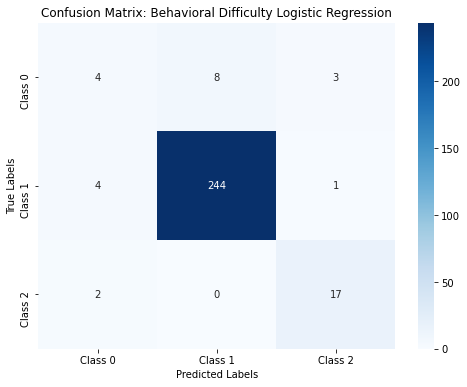

In [14]:
# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=['Class 0', 'Class 1', 'Class 2'],  # Update with actual class names if available
            yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.title("Confusion Matrix: Behavioral Difficulty Logistic Regression")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

### Compute and visualize SHAP values

In [20]:
import matplotlib.pyplot as plt

# Initialize the SHAP explainer for logistic regression
explainer = shap.LinearExplainer(behavioral_model, X_train_behavioral, feature_perturbation="interventional")

The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, or maskers.Impute)


In [21]:
# Compute SHAP values for the test set
shap_values = explainer.shap_values(X_test_behavioral)


Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


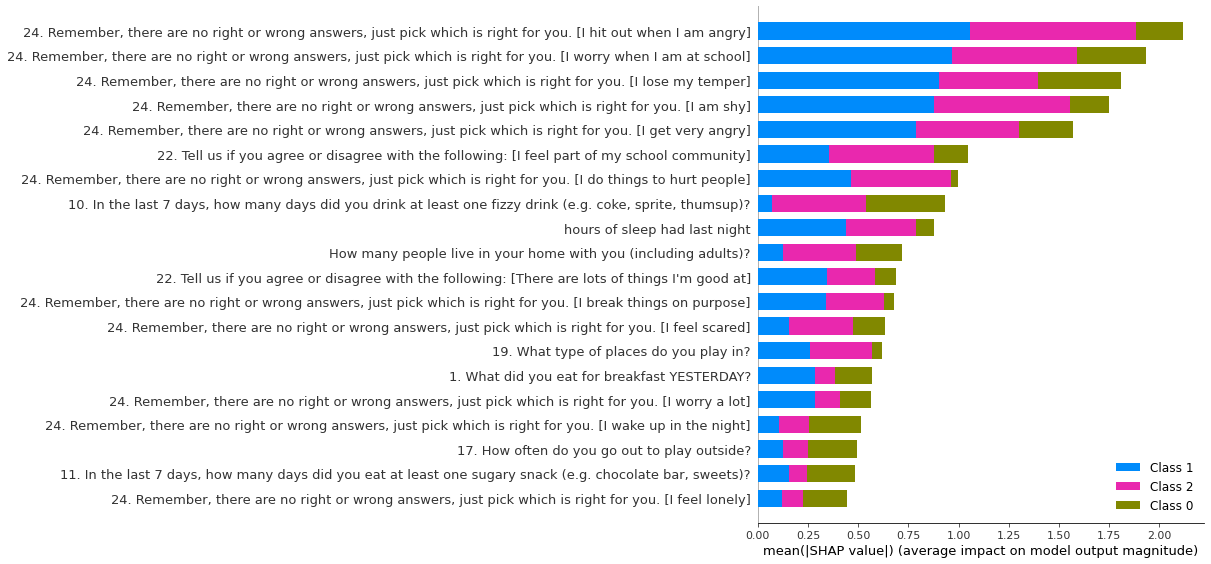

In [22]:
# Visualize the SHAP summary plot for feature importance
shap.summary_plot(shap_values, X_test_behavioral, plot_type="bar")

In [23]:
# Save the SHAP summary plot for feature importance
shap_summary_bar_path = 'C:\\Users\\srika\Desktop\\Children with ChatGPT\\Emotion_SHAP_Logistic_Summary_Bar.png'
shap.summary_plot(shap_values, X_test_behavioral, plot_type="bar", show=False)
plt.savefig(shap_summary_bar_path)
plt.close()

print(f"SHAP summary plot saved to: {shap_summary_bar_path}")


SHAP summary plot saved to: C:\Users\srika\Desktop\Children with ChatGPT\Emotion_SHAP_Logistic_Summary_Bar.png


In [ ]:
# Save the SHAP summary plot for feature importance as an image
shap_summary_bar_path = '/mnt/data/SHAP_Summary_Bar.png'
shap.summary_plot(shap_values, X_test_behavioral, plot_type="bar", show=False)
plt.savefig(shap_summary_bar_path)
plt.close()

### Insights from the Logistic Regression Model:
* Based on the logistic regression model we built for behavioral difficulty categories, here are the key insights and areas for improvement:

#### 1. Model Performance Insights:
##### Accuracy:
* Train accuracy 1.00 and Test accuracy 0.94. The model is clearly overfitting .

####  Inference from the Classification Report::
###### Class-Wise Insights:
##### 1. Class 0 (e.g., "Expected"):

* Precision (0.40):

    * Only 40% of predictions for this class were correct.
    * Indicates a high false-positive rate for this class.
* Recall (0.27):
    * The model identified only 27% of the actual instances in this class.
    * Indicates a high false-negative rate.
    
* F1-Score (0.32):
    * The harmonic mean of precision and recall is quite low, suggesting poor performance for this class.
    
* Support (15):
    * Only 15 instances belong to this class in the test set, indicating significant class imbalance.

##### Class 1 (e.g., "Borderline"):

* Precision (0.97):
    * 97% of predictions for this class were correct.
    
* Recall (0.98):
    * The model successfully identified 98% of the actual instances in this class.
    
* F1-Score (0.97):
    * Excellent performance for this majority class.
    
* Support (249):
    * Majority of the samples belong to this class, leading to strong performance.
    
##### Class 2 (e.g., "Significant Difficulty"):

* Precision (0.81):
    * 81% of predictions for this class were correct.
    
* Recall (0.89):
    * The model identified 89% of the actual instances in this class.
    
* F1-Score (0.85):
    * Indicates good but not perfect performance.
    
* Support (19):
    * Moderate class representation.
    
##### Overall Model Performance:

* Accuracy (94%):

    * High accuracy overall but biased towards the majority class (Class 1).
    
##### Macro Average:

* Precision (0.73): 
    * Average precision across all classes, irrespective of class size.
    
* Recall (0.71): 
    * Average recall across all classes, irrespective of class size.
    
* F1-Score (0.71): 
    * Indicates the model struggles with minority classes (Class 0 and Class 2).
    
* Weighted Average:

    * Weighted by the number of samples in each class.
    
* Precision (0.93): 
    * High because the majority class dominates.
    
* Recall (0.94): 
    * Reflects the model's ability to capture the majority class well.
    
* F1-Score (0.93): 
    * Overall good performance, but the imbalance impacts the minority classes.